In [1]:
# SVD on Image 

In [2]:
# import module 
# import PIL module
from PIL import Image

# open method used to open diffrent extension image file
im=Image.open(r"C:\Users\bobby\Desktop\Parul Singh\College\B.Sc Data Analytics 4th SEM\Advance Machine Learning\Images\scenery3.png")

# This  will show image in any image viewer
im.show()

Text(0.5, 1.0, 'Original RGB Image')

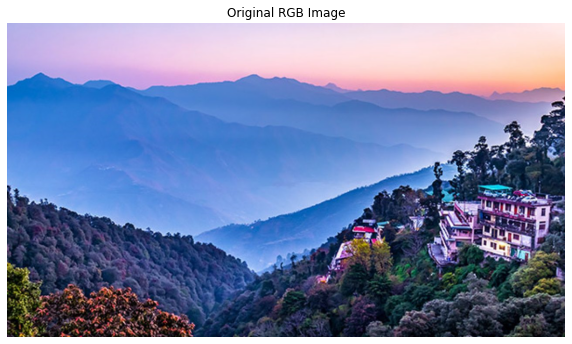

In [3]:
# import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\bobby\Desktop\Parul Singh\College\B.Sc Data Analytics 4th SEM\Advance Machine Learning\Images\scenery3.png")
plt.figure(figsize=(10,10))
plt.axis("off") # To hide axis use 'off'
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')

Text(0.5, 1.0, 'Original RGB Image')

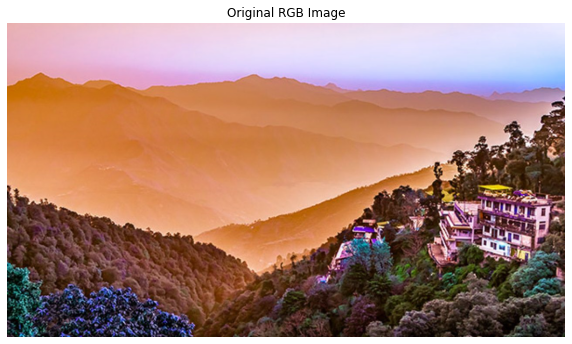

In [4]:
img = cv2.imread(r"C:\Users\bobby\Desktop\Parul Singh\College\B.Sc Data Analytics 4th SEM\Advance Machine Learning\Images\scenery3.png")
plt.figure(figsize=(10,10))
plt.axis("off") # To hide axis use 'off'
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2BGRA))
plt.title('Original RGB Image')

Text(0.5, 1.0, 'Original RGB Image')

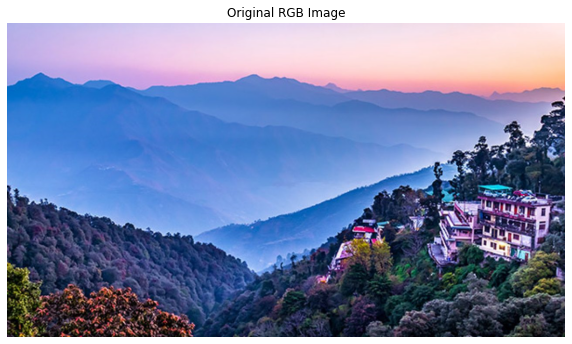

In [5]:
img = cv2.imread(r"C:\Users\bobby\Desktop\Parul Singh\College\B.Sc Data Analytics 4th SEM\Advance Machine Learning\Images\scenery3.png")
plt.figure(figsize=(10,10))
plt.axis("off") # To hide axis use 'off'
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA))
plt.title('Original RGB Image')

In [6]:
import numpy as np
from numpy.linalg import svd

# Calculating the SVD
u, s, v = np.linalg.svd(img, full_matrices=False)

# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape{v.shape}')

u.shape:(720, 1280, 3),s.shape:(720, 3),v.shape(720, 3, 3)


Text(0.5, 1.0, 'Gray Image')

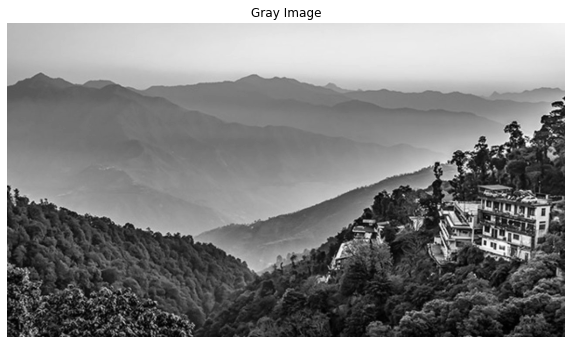

In [8]:
gray_image=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

In [9]:
# Calculating the SVD
u,s,v = np.linalg.svd(gray_image, full_matrices=False)

# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape{v.shape}')

u.shape:(720, 720),s.shape:(720,),v.shape(720, 1280)


In [10]:
# The above output shape indicates that there are 720 linearly independent


Text(0.5, 1.0, 'Actual Image')

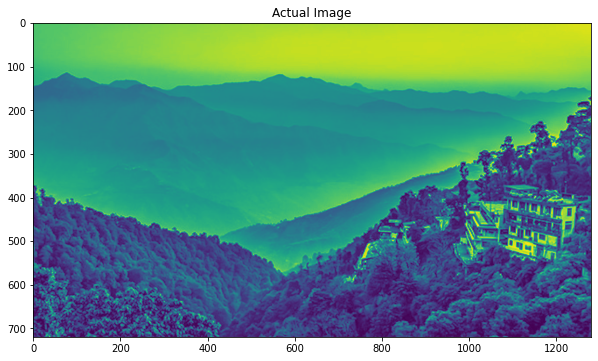

In [13]:
plt.figure(figsize=(10,10))
orig_rank=u[:,:]@ np.diag(s[:]) @ v[:,:]
plt.imshow(orig_rank)
plt.title('Actual Image')
# plt.axis("off")

variance Explained by 20 singular values:
[9.29603e-01 1.31580e-02 1.00140e-02 5.86800e-03 3.23900e-03 2.81800e-03
 2.56900e-03 2.03300e-03 1.88900e-03 1.55100e-03 1.41000e-03 1.26800e-03
 1.15900e-03 9.39000e-04 8.77000e-04 8.28000e-04 7.91000e-04 7.63000e-04
 6.65000e-04 6.18000e-04]


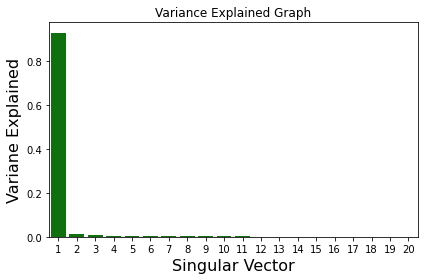

In [18]:
# import module
import seaborn as sns

var_explained = np.round(s**2/np.sum(s**2),decimals=6)

# Variance explained top singular vectors
print(f'variance Explained by 20 singular values:\n{var_explained[0:20]}')

sns.barplot(x=list(range(1,21)),
           y=var_explained[0:20],color="green")
      
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variane Explained', fontsize=16)
plt.tight_layout()
plt.show()

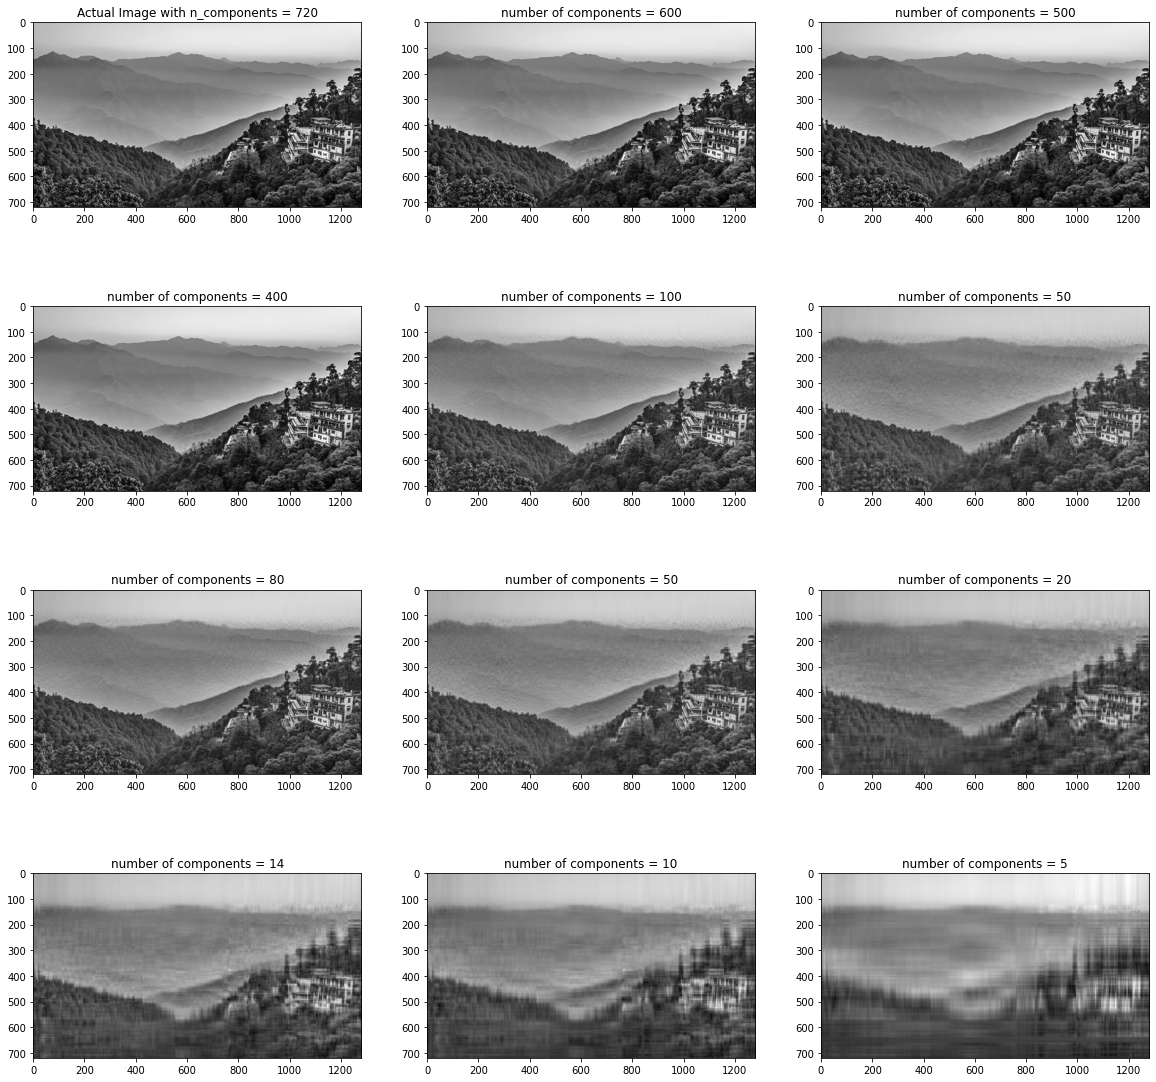

In [24]:
# Plot immages with different number of components
comps = [720,600,500,400,100,50,80,50,20,14,10,5]
plt.figure(figsize=(20,20))

for i in range(len(comps)):
    low_rank=u[:,:comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i],:]
    
    if(i==0):
        plt.subplot(4,3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
    else:
        plt.subplot(4,3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'number of components = {comps[i]}')